In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, validation_curve,cross_val_score,KFold
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,RidgeCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from math import sqrt

## Explore the data

In [2]:
oscars_df = pd.read_csv('oscar_movies_data_2.csv',index_col=0 )

In [3]:
oscars_df.head()

,IMDBId,movie title,language,country,runtime (mins),mpaarating,metacritic score,budget,distributionCompany,Awards,...,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Lasseter,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Lee Hall,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Quentin Tarantino,Writer_Woody Allen
0,tt0091763,Platoon,English,USA,120,R,92.0,6.000000e+06,Orion Pictures,Best Actor in a Supporting Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,tt0082979,Reds,English,USA,195,PG,76.0,3.200000e+07,Paramount Pictures,Best Actor in a Leading Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,tt0084434,An Officer and a Gentleman,English,USA,124,R,75.0,7.500000e+06,Paramount Pictures,Best Actor in a Supporting Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,tt0119360,In & Out,English,USA,90,PG-13,70.0,3.500000e+07,Paramount Pictures,Best Actress in a Supporting Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,tt0292542,Son of the Bride,Spanish,Argentina,123,R,68.0,1.193676e+07,Sony Pictures Classics,Best Foreign Language Film,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(oscars_df.select_dtypes(include=numerics).columns)
oscars_data = oscars_df[numerical_vars]
oscars_data.shape

(1136, 90)

In [5]:
oscars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136 entries, 0 to 3711
Data columns (total 90 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   runtime (mins)                            1136 non-null   int64  
 1   metacritic score                          1136 non-null   float64
 2   budget                                    1072 non-null   float64
 3   Total_Noms                                1136 non-null   int64  
 4   Award_Year                                1124 non-null   float64
 5   Awards_Best Actor in a Leading Role       479 non-null    float64
 6   Awards_Best Actor in a Supporting Role    479 non-null    float64
 7   Awards_Best Actress in a Leading Role     479 non-null    float64
 8   Awards_Best Art Direction-Set Decoration  479 non-null    float64
 9   Awards_Best Cinematography                479 non-null    float64
 10  Awards_Best Director                

In [6]:
#Fill the budget with the mean of the other budgets
oscars_data['budget'].fillna(oscars_data['budget'].mean(),inplace=True)
oscars_data.fillna(0,inplace=True)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [7]:
oscars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136 entries, 0 to 3711
Data columns (total 90 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   runtime (mins)                            1136 non-null   int64  
 1   metacritic score                          1136 non-null   float64
 2   budget                                    1136 non-null   float64
 3   Total_Noms                                1136 non-null   int64  
 4   Award_Year                                1136 non-null   float64
 5   Awards_Best Actor in a Leading Role       1136 non-null   float64
 6   Awards_Best Actor in a Supporting Role    1136 non-null   float64
 7   Awards_Best Actress in a Leading Role     1136 non-null   float64
 8   Awards_Best Art Direction-Set Decoration  1136 non-null   float64
 9   Awards_Best Cinematography                1136 non-null   float64
 10  Awards_Best Director                

## Baseline Model

In [9]:
baseline_df = oscars_data.drop(columns=['Director_Avg_Score','Total_Directed_Movies','Total_Noms',\
                                        'Lead_Actor_Avg_Score','Total_Movies_Lead_Actor',\
                                        'Avg_Rating_by_writer','Award_Year'])

In [10]:
def ols_model(X,y):
    '''
    Scale and print results summary
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    X_train_scale = X_train.copy()
  
    scale = StandardScaler().fit(X_train_scale)
    
    X_train_scale = scale.transform(X_train_scale)
    model = sm.OLS(y_train, sm.add_constant(X_train_scale))
    results = model.fit()

    return results.summary()

In [11]:
def train_and_test_linear(X,y):
    '''
    Scale data and perform a linear regression on it and cross validation on it 
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)
    
    X_train_scale = X_train.values
    X_test_scale = X_test.values
    
    scale = StandardScaler()

    X_train_scaled = scale.fit_transform(X_train_scale)
    X_test_scaled = scale.transform(X_test_scale)
  
    lm = LinearRegression()
    lm.fit(X_train_scale,y_train)
    y_pred = lm.predict(X_test_scale)
        
    print(f'Linear Regression val R^2: {lm.score(X_train_scale, y_train):.3f}')
    print(f'Linear Regression val RME: {sqrt(mean_squared_error(y_test,y_pred)):.3f}')
    #return y_pred

In [12]:
def scale_test_and_train_Lasso(X,y):
    
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2,random_state=10)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
    
    X_train_scale = X_train.values
    X_val_scale = X_val.values
    X_test_scale = X_test.values
    
    scale = StandardScaler()

    X_train_scale = scale.fit_transform(X_train_scale)
    X_test_scale = scale.transform(X_test_scale)
    X_val_scale = scale.transform(X_val_scale)
    
    lasso = LassoCV()
    lasso.fit(X_train_scale,y_train)
    
    lasso.score(X_val_scale,y_val)
    
    y_pred = lasso.predict(X_val_scale)
    
    
    print(f'Lasso Regression val R^2: {lasso.score(X_val_scale, y_val):.3f}')
    print(f'Lasso Regression val RME: {sqrt(mean_squared_error(y_val,y_pred)):.3f}')
    
    return lasso.coef_

In [13]:
def scale_test_and_train_ridge(X,y):
    
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2,random_state=10)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)
    
    X_train_scale = X_train.values
    X_val_scale = X_val.values
    X_test_scale = X_test.values
    
    scale = StandardScaler()

    X_train_scale = scale.fit_transform(X_train_scale)
    X_test_scale = scale.transform(X_test_scale)
    X_val_scale = scale.transform(X_val_scale)
    
    ridge = RidgeCV(cv=5)
    ridge.fit(X_train_scale,y_train)
    
    ridge.score(X_train_scale,y_train)
    
    y_pred = ridge.predict(X_val_scale)
    
    
    print(f'Ridge Regression val R^2: {ridge.score(X_val_scale, y_val):.3f}')
    print(f'Ridge Regression val RME: {sqrt(mean_squared_error(y_val,y_pred)):.3f}')
    
    return ridge.coef_

## Run initial regressions on baseline model

In [14]:
X = baseline_df.drop(columns='metacritic score')
y = baseline_df['metacritic score']

In [15]:
train_and_test_linear(X,y)

Linear Regression val R^2: 0.328
Linear Regression val RME: 13.353


In [16]:
ols_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     4.730
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           4.18e-31
Time:                        19:46:41   Log-Likelihood:                -3484.2
No. Observations:                 908   AIC:                             7128.
Df Residuals:                     828   BIC:                             7513.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.9559      0.390    184.439      0.000      71.190      72.722
x1             0.5375      0.526      1.022      0.307      -0.495       1.570
x2            -0.3214      0.565     -0.569      0.569      -1.430       0.787
x3             2.2985      0.445      5.167      0.000       1.425       3.172
x4             1.5145      0.433      3.497      0.000       0.664       2.365
x5             1.0470      0.432      2.423      0.016       0.199       1.895
x6             0.4362      0.419      1.040      0.299      -0.387       1.259
x7             0.8513      0.405      2.101      0.036       0.056       1.647
x8             0.9264      0.420      2.208      0.028       0.103       1.750
x9            -0.5854      0.406     -1.441      0.150      -1.383       0.212
x10            3.9081      0.439      8.896      0.000       3.046       4.770
x11            1.6548      0.410      4.033      0.000       0.849       2.460
x12           -1.1358      0.412     -2.754      0.006      -1.945      -0.326
x13           -1.2758      0.452     -2.823      0.005      -2.163      -0.389
x14           -1.2331      0.446     -2.764      0.006      -2.109      -0.357
x15            0.1744      0.413      0.422      0.673      -0.637       0.986
x16           -0.1121      0.430     -0.261      0.794      -0.956       0.732
x17           -1.4646      0.449     -3.264      0.001      -2.345      -0.584
x18            1.4467      0.426      3.400      0.001       0.612       2.282
x19           -0.6915      0.432     -1.601      0.110      -1.539       0.157
x20           -1.8052      0.444     -4.065      0.000      -2.677      -0.934
x21           -0.3632      0.478     -0.761      0.447      -1.301       0.574
x22           -1.1378      0.479     -2.375      0.018      -2.078      -0.198
x23            0.7683      2.249      0.342      0.733      -3.646       5.183
x24            0.0049      1.630      0.003      0.998      -3.195       3.204
x25            3.0624      1.735      1.765      0.078      -0.343       6.468
x26            1.2693      2.369      0.536      0.592      -3.381       5.919
x27            1.4205      2.446      0.581      0.561      -3.380       6.221
x28            0.3110      1.760      0.177      0.860      -3.143       3.765
x29            2.2534      1.294      1.742      0.082      -0.286       4.792
x30            1.6440      2.915      0.564      0.573      -4.077       7.365
x31           -0.1875      0.579     -0.324      0.746      -1.324       0.949
x32            0.4613      0.500      0.922      0.357      -0.521       1.443
x33            0.1752      0.697      0.251      0.802      -1.193       1.543
x34           -0.2021      0.527     -0.384      0.701      -1.236       0.832
x35            0.2199      0.523      0.421      0.674      -0.806       1.245
x3

## High condition score add in engineered features

In [17]:
oscars_data

,runtime (mins),metacritic score,budget,Total_Noms,Award_Year,Awards_Best Actor in a Leading Role,Awards_Best Actor in a Supporting Role,Awards_Best Actress in a Leading Role,Awards_Best Art Direction-Set Decoration,Awards_Best Cinematography,...,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Lasseter,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Lee Hall,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Quentin Tarantino,Writer_Woody Allen
0,120,92.0,6.000000e+06,7,1987.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,195,76.0,3.200000e+07,12,1981.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,124,75.0,7.500000e+06,6,1982.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,90,70.0,3.500000e+07,1,1997.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,123,68.0,1.193676e+07,1,2001.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,110,77.0,4.100000e+07,1,2002.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3699,105,65.0,1.000000e+08,3,1999.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3702,143,40.0,7.000000e+07,3,2004.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3707,107,57.0,4.425875e+07,3,1989.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
oscars_data.corr()

,runtime (mins),metacritic score,budget,Total_Noms,Award_Year,Awards_Best Actor in a Leading Role,Awards_Best Actor in a Supporting Role,Awards_Best Actress in a Leading Role,Awards_Best Art Direction-Set Decoration,Awards_Best Cinematography,...,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Lasseter,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Lee Hall,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Quentin Tarantino,Writer_Woody Allen
runtime (mins),1.000000,-0.019315,0.209810,0.355896,0.062201,0.132043,0.078923,0.005028,0.086136,0.033169,...,0.008801,-0.013792,-0.053922,0.069414,0.023093,0.005363,0.102951,-0.039734,0.130759,-0.111100
metacritic score,-0.019315,1.000000,-0.154606,0.327954,-0.005633,0.080313,0.025476,-0.013267,-0.042860,-0.028671,...,0.010307,0.037558,0.061059,-0.002373,-0.044491,-0.016820,0.069278,0.067315,0.023753,0.017157
budget,0.209810,-0.154606,1.000000,0.046763,0.034585,-0.100454,-0.087471,-0.070021,-0.020378,-0.026026,...,0.005100,-0.017394,0.114327,0.129906,0.025417,-0.011952,-0.019045,-0.044876,0.016457,-0.057594
Total_Noms,0.355896,0.327954,0.046763,1.000000,0.071295,0.237237,0.119842,0.046157,0.046992,0.026253,...,-0.002622,0.024378,0.001532,0.075626,0.014534,0.001532,0.041133,-0.037707,0.073881,-0.016481
Award_Year,0.062201,-0.005633,0.034585,0.071295,1.000000,0.017762,0.014441,0.015956,0.008851,0.006575,...,0.009254,0.012536,0.007936,0.009039,0.003843,0.009169,0.008715,0.007546,0.009788,0.007576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Writer_Lee Hall,0.005363,-0.016820,-0.011952,0.001532,0.009169,-0.019169,-0.016029,-0.015116,-0.010907,-0.007753,...,-0.004332,-0.005312,-0.003534,-0.003952,-0.004681,1.000000,-0.003952,-0.003952,-0.004332,-0.006142
Writer_Paul Thomas Anderson,0.102951,0.069278,-0.019045,0.041133,0.008715,-0.021441,0.087874,-0.016908,-0.012200,-0.008672,...,-0.004845,-0.005942,-0.003952,-0.004421,-0.005235,-0.003952,1.000000,-0.004421,-0.004845,-0.006870
Writer_Pedro Almodóvar,-0.039734,0.067315,-0.044876,-0.037707,0.007546,-0.021441,-0.017929,-0.016908,-0.012200,-0.008672,...,-0.004845,-0.005942,-0.003952,-0.004421,-0.005235,-0.003952,-0.004421,1.000000,-0.004845,-0.006870
Writer_Quentin Tarantino,0.130759,0.023753,0.016457,0.073881,0.009788,0.018081,0.028665,-0.018530,-0.013370,-0.009504,...,-0.005310,-0.006512,-0.004332,-0.004845,-0.005738,-0.004332,-0.004845,-0.004845,1.000000,-0.007529


In [19]:
X= oscars_data.drop(columns=['metacritic score'])
y= oscars_data['metacritic score']

In [20]:
train_and_test_linear(X,y)

Linear Regression val R^2: 0.428
Linear Regression val RME: 12.919


In [21]:
ols_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     6.648
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           1.41e-51
Time:                        19:46:48   Log-Likelihood:                -3413.3
No. Observations:                 908   AIC:                             7001.
Df Residuals:                     821   BIC:                             7419.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.9559      0.362    198.561      0.000      71.245      72.667
x1            -0.6560      0.507     -1.293      0.196      -1.652       0.340
x2            -0.5218      0.554     -0.942      0.347      -1.610       0.566
x3             4.9405      0.546      9.047      0.000       3.869       6.012
x4             0.0743      0.721      0.103      0.918      -1.342       1.490
x5             0.7420      0.449      1.652      0.099      -0.140       1.624
x6             0.2775      0.423      0.656      0.512      -0.553       1.108
x7             0.3535      0.411      0.860      0.390      -0.453       1.160
x8            -0.1353      0.396     -0.342      0.733      -0.913       0.642
x9             0.6945      0.379      1.835      0.067      -0.049       1.438
x10            0.7941      0.396      2.007      0.045       0.017       1.571
x11           -0.5250      0.378     -1.389      0.165      -1.267       0.217
x12            0.9573      0.512      1.870      0.062      -0.048       1.962
x13            0.3747      0.406      0.923      0.356      -0.422       1.172
x14           -0.8823      0.384     -2.295      0.022      -1.637      -0.128
x15            2.2321      0.408      5.468      0.000       1.431       3.033
x16            0.0839      0.648      0.130      0.897      -1.187       1.355
x17            0.1180      0.391      0.302      0.763      -0.649       0.885
x18           -1.2541      0.559     -2.243      0.025      -2.352      -0.156
x19            1.0837      0.408      2.653      0.008       0.282       1.885
x20           -1.1485      0.422     -2.723      0.007      -1.976      -0.321
x21           -1.1544      0.416     -2.776      0.006      -1.971      -0.338
x22            0.0550      0.386      0.143      0.887      -0.702       0.812
x23           -0.3863      0.401     -0.964      0.335      -1.173       0.400
x24           -1.2706      0.423     -3.001      0.003      -2.102      -0.439
x25            1.5634      0.397      3.940      0.000       0.784       2.342
x26           -0.2619      0.403     -0.649      0.516      -1.054       0.530
x27           -1.5816      0.413     -3.829      0.000      -2.392      -0.771
x28            0.1857      0.446      0.416      0.678      -0.691       1.062
x29           -0.9488      0.448     -2.116      0.035      -1.829      -0.069
x30            1.5295      2.096      0.730      0.466      -2.585       5.644
x31            0.2448      1.518      0.161      0.872      -2.735       3.224
x32            3.2183      1.614      1.993      0.047       0.049       6.387
x33            2.0328      2.207      0.921      0.357      -2.299       6.364
x34            2.2806      2.280      1.000      0.317      -2.194       6.755
x35            1.0727      1.640      0.654      0.513      -2.147       4.292
x3

### Going to perform a Lasso Regression on the model due to high P-values and still a high condition number

In [22]:
lasso = scale_test_and_train_Lasso(X,y)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.20083027658984, tolerance: 10.162134558823526
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.79964990558801, tolerance: 10.162134558823526
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.386260646148, tolerance: 10.162134558823526
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.99584286622121, tolerance: 10.162134558823526
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101.80306875339738, tolerance: 10.162134558823526
  model = cd_fast.enet_coordinate_descent_gram(
/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.95592898067116, tolerance: 10.162134558823526
  model = cd_fast.enet_coordinate_descent_gram(
/Use

Lasso Regression val R^2: 0.322
Lasso Regression val RME: 11.251


In [23]:
list(zip(oscars_data.drop(columns='metacritic score'),lasso))

[('runtime (mins)', -0.0),
 ('budget', -0.5266835010285305),
 ('Total_Noms', 4.480313799063826),
 ('Award_Year', -0.0),
 ('Awards_Best Actor in a Leading Role', 0.05434899553598313),
 ('Awards_Best Actor in a Supporting Role', 0.0),
 ('Awards_Best Actress in a Leading Role', 0.0),
 ('Awards_Best Art Direction-Set Decoration', -0.0),
 ('Awards_Best Cinematography', -0.0),
 ('Awards_Best Director', 0.12985838138724015),
 ('Awards_Best Film Editing', -0.028629527534002528),
 ('Awards_Best Motion Picture of the Year', 0.7328454061722881),
 ('Awards_Best Picture', 0.0),
 ('Awards_Best Sound', -0.8600210445593757),
 ('Director_Avg_Score', 2.9267494744215905),
 ('Total_Directed_Movies', -0.0),
 ('Lead_Actor_Avg_Score', 0.0),
 ('Total_Movies_Lead_Actor', -0.7098371053804822),
 ('Avg_Rating_by_writer', 0.9111112549935795),
 ('Buena Vista Pictures', -0.6492842333283797),
 ('Columbia Pictures', -0.6503247818232336),
 ('Fox Searchlight Pictures', 0.0),
 ('Miramax', 0.0),
 ('Paramount Pictures', -1

## Pull out non zeroed out columns perform a simple linear regression and look at condition number

In [26]:
smaller_df = oscars_data.drop(columns= ['runtime (mins)','Award_Year', 'Awards_Best Actor in a Supporting Role',\
                                        'Awards_Best Actress in a Leading Role', 'Awards_Best Art Direction-Set Decoration',\
                                        'Awards_Best Cinematography','Awards_Best Picture','Total_Directed_Movies',\
                                        'Lead_Actor_Avg_Score', 'Fox Searchlight Pictures','Miramax','Twentieth Century Fox',\
                                        'Genre_Biography','Genre_Comedy', 'Genre_Crime','Genre_Drama','Genre_Mystery',\
                                        'Subgenre_Adventure','Subgenre_Crime','Subgenre_Drama', 'Subgenre_History', \
                                        'Subgenre_Mystery', 'Director_Clint Eastwood','Director_Martin Scorsese',\
                                        'Director_Ridley Scott','Director_Robert Zemeckis','Director_Stephen Frears',\
                                        'Director_Steven Spielberg', 'Director_Woody Allen', 'Lead_Actor_Harrison Ford',\
                                        'Lead_Actor_Jeff Bridges',  'Lead_Actor_Johnny Depp', 'Lead_Actor_Meryl Streep', \
                                        'Lead_Actor_Robert Downey Jr.','Lead_Actor_Tom Cruise','Fall', 'Winter', 'G', 'R',\
                                        'Unrated', 'Writer_Aaron Sorkin','Writer_Joel Coen', 'Writer_John Logan', \
                                        'Writer_Lee Hall', 'Writer_Quentin Tarantino','Writer_Woody Allen'])

In [27]:
smaller_df.corr()

,metacritic score,budget,Total_Noms,Awards_Best Actor in a Leading Role,Awards_Best Director,Awards_Best Film Editing,Awards_Best Motion Picture of the Year,Awards_Best Sound,Director_Avg_Score,Total_Movies_Lead_Actor,...,Lead_Actor_Tom Hanks,Spring,Summer,Not Rated,PG,PG-13,Writer_John Lasseter,Writer_Lawrence Kasdan,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar
metacritic score,1.000000,-0.154606,0.327954,0.080313,0.068001,-0.063184,0.255874,-0.129017,2.747819e-01,-0.075356,...,0.041248,-0.099219,0.009943,0.082425,-0.087342,-0.125632,0.061059,-0.044491,0.069278,0.067315
budget,-0.154606,1.000000,0.046763,-0.100454,-0.052227,-0.022305,0.002108,0.044777,-4.937678e-02,0.232383,...,0.067131,0.107107,0.073144,-0.060157,0.116777,0.202384,0.114327,0.025417,-0.019045,-0.044876
Total_Noms,0.327954,0.046763,1.000000,0.237237,-0.032434,-0.032492,0.468844,-0.054768,6.914907e-02,0.130491,...,0.066950,-0.098409,-0.086312,-0.110333,-0.005239,0.010540,0.001532,0.014534,0.041133,-0.037707
Awards_Best Actor in a Leading Role,0.080313,-0.100454,0.237237,1.000000,-0.033319,-0.030389,-0.111338,-0.033319,-9.187256e-03,0.002715,...,0.075445,-0.078250,-0.061732,-0.056641,0.023451,-0.087654,-0.019169,-0.025391,-0.021441,-0.021441
Awards_Best Director,0.068001,-0.052227,-0.032434,-0.033319,1.000000,-0.009737,-0.035675,-0.010676,3.094825e-02,-0.053019,...,-0.013476,0.022415,-0.031861,-0.018149,-0.027392,-0.062878,-0.006142,-0.008136,-0.006870,0.123203
Awards_Best Film Editing,-0.063184,-0.022305,-0.032492,-0.030389,-0.009737,1.000000,-0.032538,-0.009737,-2.582065e-02,0.001212,...,-0.012291,0.030858,-0.025194,-0.016553,0.003236,-0.036128,-0.005602,-0.007420,-0.006266,-0.006266
Awards_Best Motion Picture of the Year,0.255874,0.002108,0.468844,-0.111338,-0.035675,-0.032538,1.000000,-0.035675,1.419259e-01,0.152106,...,0.021722,-0.078037,-0.064916,-0.060647,-0.114115,0.059758,0.027648,-0.027187,0.063255,-0.022957
Awards_Best Sound,-0.129017,0.044777,-0.054768,-0.033319,-0.010676,-0.009737,-0.035675,1.000000,-4.385853e-02,-0.015794,...,-0.013476,0.108052,0.010521,-0.018149,0.016809,0.053457,-0.006142,-0.008136,-0.006870,-0.006870
Director_Avg_Score,0.274782,-0.049377,0.069149,-0.009187,0.030948,-0.025821,0.141926,-0.043859,1.000000e+00,0.036708,...,0.012415,-0.045536,-0.052624,0.000376,-0.045109,-0.002726,0.040448,-0.034808,0.077947,0.081331
Total_Movies_Lead_Actor,-0.075356,0.232383,0.130491,0.002715,-0.053019,0.001212,0.152106,-0.015794,3.670805e-02,1.000000,...,0.435836,-0.044257,-0.015968,-0.091992,-0.075499,0.108863,0.205071,-0.009200,0.026726,-0.030764


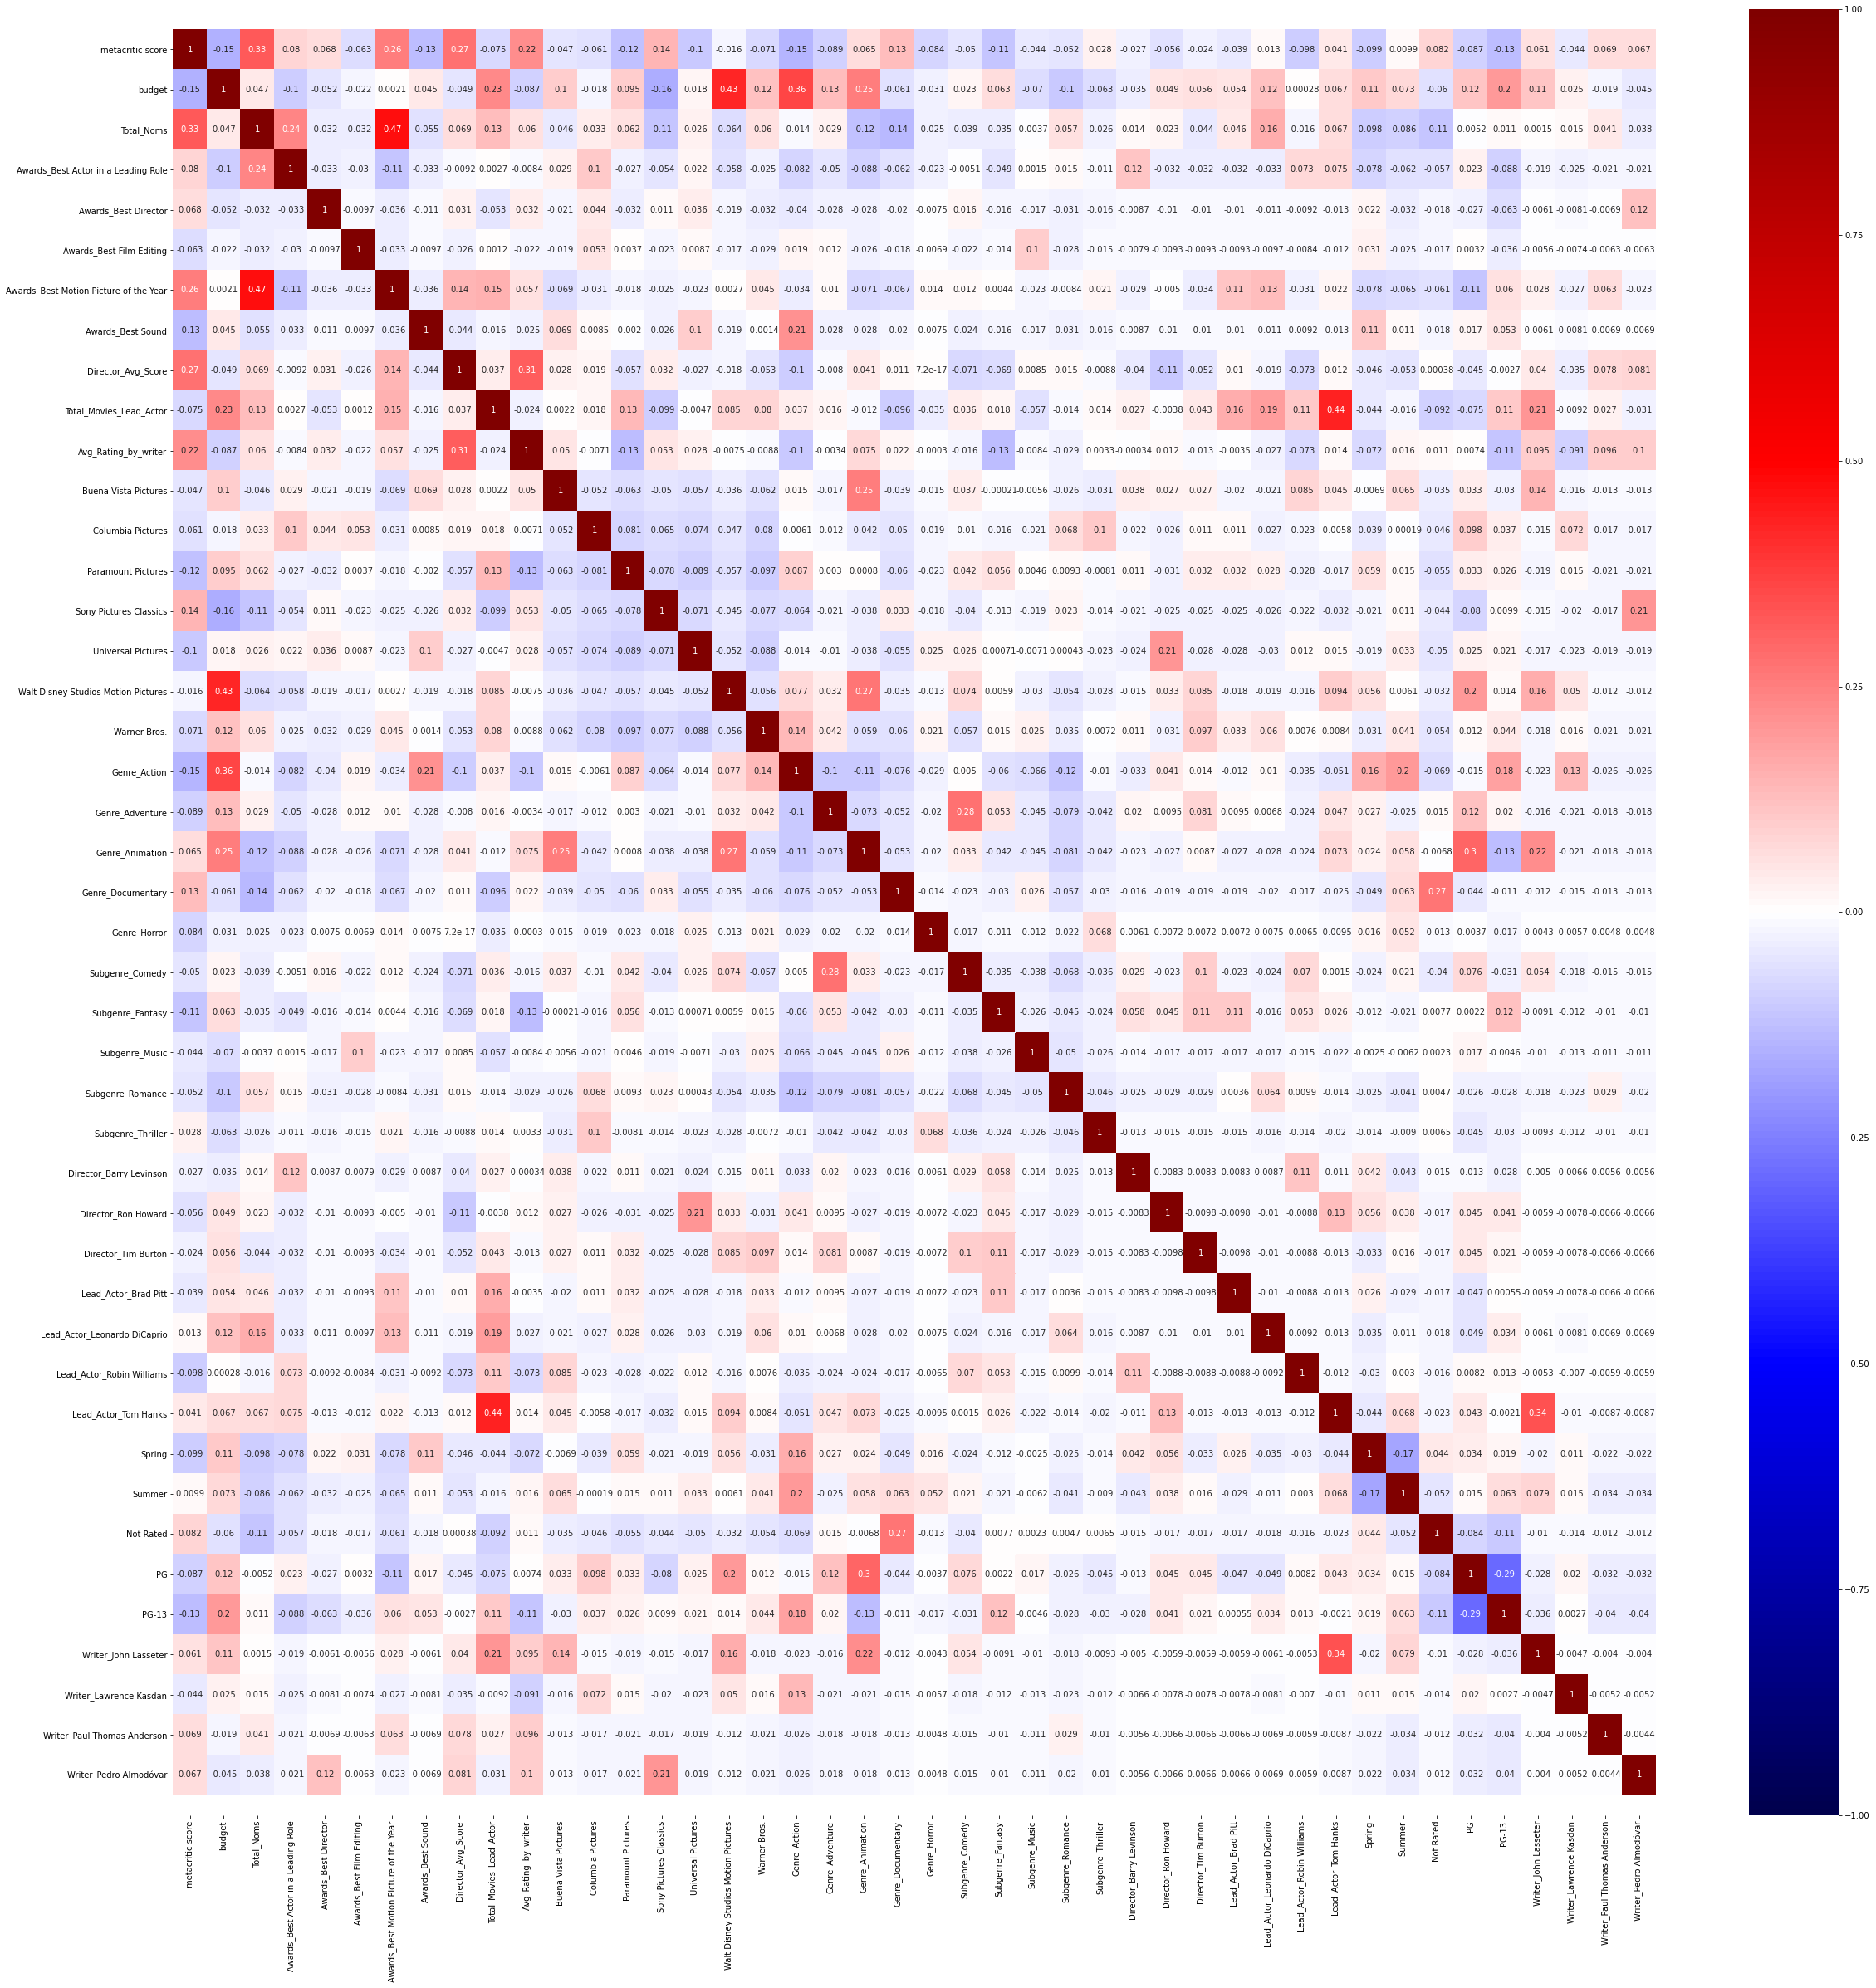

In [28]:
plt.figure(figsize=(40,40))
sns.heatmap(smaller_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(smaller_df.corr())+0.5, -0.5);

In [29]:
X = smaller_df.drop(columns =['metacritic score'])
y = smaller_df['metacritic score']

In [30]:
train_and_test_linear(X,y)

Linear Regression val R^2: 0.418
Linear Regression val RME: 12.765


In [31]:
ols_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     12.79
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           2.64e-66
Time:                        19:55:14   Log-Likelihood:                -3429.6
No. Observations:                 908   AIC:                             6947.
Df Residuals:                     864   BIC:                             7159.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.9559      0.360    200.065      0.000      71.250      72.662
x1            -0.8853      0.486     -1.823      0.069      -1.839       0.068
x2             4.9510      0.453     10.935      0.000       4.062       5.840
x3             0.4620      0.400      1.155      0.248      -0.323       1.247
x4             0.7321      0.376      1.947      0.052      -0.006       1.470
x5            -0.4676      0.368     -1.272      0.204      -1.189       0.254
x6             0.9764      0.438      2.228      0.026       0.116       1.837
x7            -0.9571      0.374     -2.559      0.011      -1.691      -0.223
x8             2.2672      0.387      5.853      0.000       1.507       3.027
x9            -1.2895      0.450     -2.867      0.004      -2.172      -0.407
x10            1.0516      0.396      2.658      0.008       0.275       1.828
x11           -1.1202      0.395     -2.839      0.005      -1.895      -0.346
x12           -1.0185      0.388     -2.622      0.009      -1.781      -0.256
x13           -1.0590      0.389     -2.721      0.007      -1.823      -0.295
x14            1.4499      0.377      3.842      0.000       0.709       2.191
x15           -1.3421      0.385     -3.488      0.001      -2.097      -0.587
x16            0.1759      0.428      0.410      0.682      -0.665       1.017
x17           -0.6936      0.392     -1.771      0.077      -1.462       0.075
x18           -0.3882      0.450     -0.863      0.388      -1.271       0.495
x19           -1.0948      0.410     -2.671      0.008      -1.899      -0.290
x20            1.7927      0.444      4.034      0.000       0.920       2.665
x21            1.4437      0.389      3.713      0.000       0.681       2.207
x22           -0.5515      0.365     -1.513      0.131      -1.267       0.164
x23            0.0841      0.393      0.214      0.831      -0.688       0.856
x24           -0.6723      0.381     -1.763      0.078      -1.421       0.076
x25           -0.6746      0.370     -1.825      0.068      -1.400       0.051
x26           -1.3119      0.377     -3.484      0.001      -2.051      -0.573
x27            0.3816      0.370      1.031      0.303      -0.345       1.108
x28           -0.1515      0.370     -0.409      0.682      -0.878       0.575
x29           -0.3655      0.377     -0.969      0.333      -1.106       0.375
x30            0.5112      0.372      1.374      0.170      -0.219       1.242
x31           -0.3475      0.371     -0.938      0.349      -1.075       0.380
x32           -0.1746      0.379     -0.460      0.645      -0.919       0.570
x33           -0.7930      0.378     -2.096      0.036      -1.535      -0.051
x34            0.5700      0.424      1.345      0.179      -0.262       1.402
x35           -0.2839      0.383     -0.742      0.459      -1.035       0.468
x3

In [42]:
lasso = scale_test_and_train_Lasso(X,y)

Lasso Regression val R^2: 0.257
Lasso Regression val RME: 11.920


array([-1.17492458,  4.25375296,  0.37702176,  0.71016493, -0.        ,
        1.26755309, -0.32329276,  2.91698477, -0.67161353,  0.21232495,
        0.        , -1.22901241, -0.77118243,  0.87633204, -1.1410928 ,
        0.74867812, -0.99043391, -1.2822895 , -1.46112716,  0.41209816,
        1.20601097, -1.76061224, -0.        ,  0.        , -0.59849435,
       -0.41653707,  0.56844815, -0.31179801, -0.68336272,  0.37931569,
       -0.03768215, -0.        , -0.        ,  0.03071862, -0.46058597,
        0.19232688,  0.87480778, -0.16465718, -0.        ,  0.35428148,
       -0.1201227 ,  0.2468834 ,  0.1310018 ])

In [44]:
list(zip(smaller_df.drop(columns='metacritic score'),lasso))

[('budget', -0.0),
 ('Total_Noms', -0.5266835010285305),
 ('Awards_Best Actor in a Leading Role', 4.480313799063826),
 ('Awards_Best Director', -0.0),
 ('Awards_Best Film Editing', 0.05434899553598313),
 ('Awards_Best Motion Picture of the Year', 0.0),
 ('Awards_Best Sound', 0.0),
 ('Director_Avg_Score', -0.0),
 ('Total_Movies_Lead_Actor', -0.0),
 ('Avg_Rating_by_writer', 0.12985838138724015),
 ('Buena Vista Pictures', -0.028629527534002528),
 ('Columbia Pictures', 0.7328454061722881),
 ('Paramount Pictures', 0.0),
 ('Sony Pictures Classics', -0.8600210445593757),
 ('Universal Pictures', 2.9267494744215905),
 ('Walt Disney Studios Motion Pictures', -0.0),
 ('Warner Bros.', 0.0),
 ('Genre_Action', -0.7098371053804822),
 ('Genre_Adventure', 0.9111112549935795),
 ('Genre_Animation', -0.6492842333283797),
 ('Genre_Documentary', -0.6503247818232336),
 ('Genre_Horror', 0.0),
 ('Subgenre_Comedy', 0.0),
 ('Subgenre_Fantasy', -1.3057876090701945),
 ('Subgenre_Music', 1.3200002451579231),
 ('Sub

In [46]:
final_df = smaller_df.drop(columns = ['budget','Awards_Best Director','Awards_Best Motion Picture of the Year',\
                                     'Awards_Best Sound','Director_Avg_Score','Total_Movies_Lead_Actor',\
                                     'Paramount Pictures','Walt Disney Studios Motion Pictures','Warner Bros.',\
                                     'Genre_Horror','Subgenre_Comedy','Subgenre_Romance','Lead_Actor_Robin Williams',\
                                     'Lead_Actor_Tom Hanks','Spring','Not Rated','PG-13','Writer_John Lasseter','Writer_Paul Thomas Anderson',\
                                     'Writer_Pedro Almodóvar'] )

In [ ]:
X= final_df.drop(columns = 'metacritic score')

## Satisfied with final features will now select the final model

In [32]:
def cross_val_linear(X,y):
    '''
    Scale data and perform a linear regression on it and cross validation on it 
    '''
    X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    r2_scores, rme_scores = [], [] #collect the validation results for both models

    for train_ind, val_ind in kf.split(X,y):
    
        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_val, y_val = X.iloc[val_ind], y.iloc[val_ind] 
        
        scale = StandardScaler()
        X_train_scale = scale.fit_transform(X_train)
        X_val_scale = scale.transform(X_val)
        
       
        lm = LinearRegression()
      
        

        lm.fit(X_train_scale, y_train)
        
        y_pred = lm.predict(X_val_scale)
        r2_scores.append(lm.score(X_val_scale, y_val))
        rme_scores.append(sqrt(mean_squared_error(y_val,y_pred)))
                        

    print('Scaled regression scores: ', r2_scores)
    print('Scaled regression RME scores: ',rme_scores)
    print(f'Scaled mean cv r^2: {np.mean(r2_scores):.3f} ')
    print(f'Scaled mean cv r^2: {np.mean(rme_scores):.3f}')

In [33]:
cross_val_linear(X,y)

Scaled regression scores:  [0.35019544103786604, 0.2919281400806587, 0.34022679860582106, 0.3951235054572101, 0.2811198237467206]
Scaled regression RME scores:  [11.60610342173497, 10.544884051975592, 11.206980222075021, 10.433911366246289, 10.860445471084105]
Scaled mean cv r^2: 0.332 
Scaled mean cv r^2: 10.930


In [34]:
scale_test_and_train_Lasso(X,y)

Lasso Regression val R^2: 0.308
Lasso Regression val RME: 11.366


array([-0.6082631 ,  4.99944541,  0.4943108 ,  0.39833697, -0.19873212,
        0.94318884, -1.02410333,  3.00555351, -1.04311594,  0.97129118,
       -1.07616025, -1.10815194, -1.69779645,  1.48462761, -1.23106113,
        0.70836961, -1.08854208, -0.79970255, -1.89613103,  0.89406684,
        1.58940177, -1.51622343,  0.8900297 , -0.5622877 , -1.11847384,
       -1.00585265,  0.54876985, -0.49244368, -0.91606591,  0.70941242,
       -0.5267407 , -0.38640954, -0.43858344,  0.52704698, -0.22122884,
        0.48323669,  1.01283279, -0.74563117, -0.71431319,  0.19103865,
        0.4123394 ,  0.32453537,  0.22591865])

In [35]:
scale_test_and_train_ridge(X,y)

Ridge Regression val R^2: 0.311
Ridge Regression val RME: 11.342


array([-0.61140832,  4.88266039,  0.51980494,  0.39838477, -0.20983563,
        0.99154364, -1.01967089,  2.9666207 , -1.03248562,  0.97861526,
       -1.06128352, -1.08730825, -1.66307988,  1.46603603, -1.21479478,
        0.70266925, -1.0755538 , -0.78868121, -1.85668773,  0.88685506,
        1.57092607, -1.49831502,  0.86356125, -0.56116219, -1.09944878,
       -0.98702053,  0.53976448, -0.4902388 , -0.90492009,  0.69341186,
       -0.52716989, -0.37531065, -0.44027626,  0.51727801, -0.24153483,
        0.46728823,  1.00289887, -0.74451649, -0.71393104,  0.19781558,
        0.4134206 ,  0.33014026,  0.23213307])

### Final Model
* The linear model is giving the best with the validation I will run that with the test scores

In [38]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

X_train_scale = X.values
X_test_scale = X_test.values

scale = StandardScaler().fit(X_train_scale)
X_train_scale = scale.transform(X_train_scale)
X_test_scale =scale.transform(X_test_scale)

linear = LinearRegression()
linear.fit(X_train_scale,y)

y_pred = linear.predict(X_test_scale)


sqrt(mean_squared_error(y_test,y_pred))

11.113104260626994

In [39]:
linear.score(X_test_scale,y_test)

0.42766720112677004

Text(0, 0.5, 'Residuals')

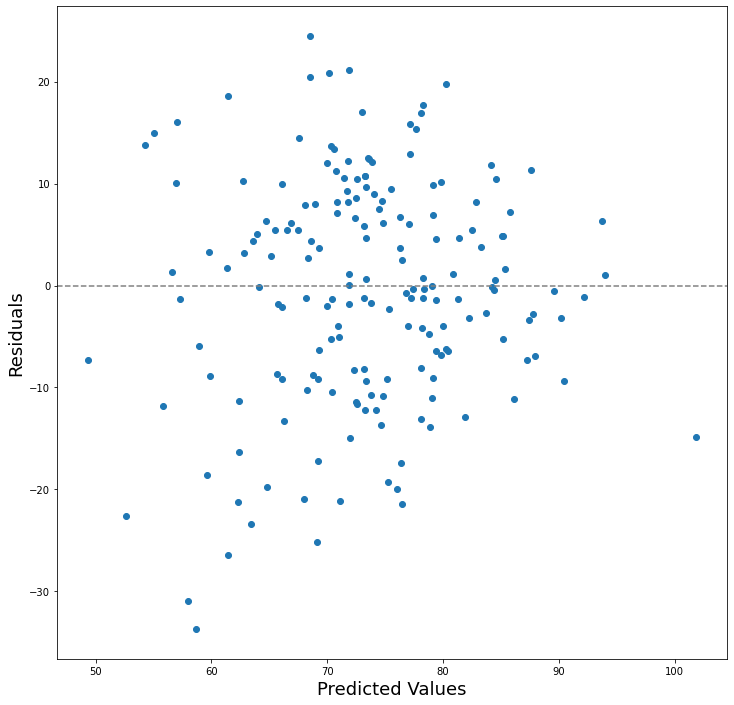

In [40]:
residuals = y_test - y_pred

plt.figure(figsize=(12,12))
plt.scatter(y_pred,residuals)

plt.axhline(0,linestyle="--",color='gray')
plt.xlabel('Predicted Values',fontsize=18)
plt.ylabel('Residuals',fontsize=18)

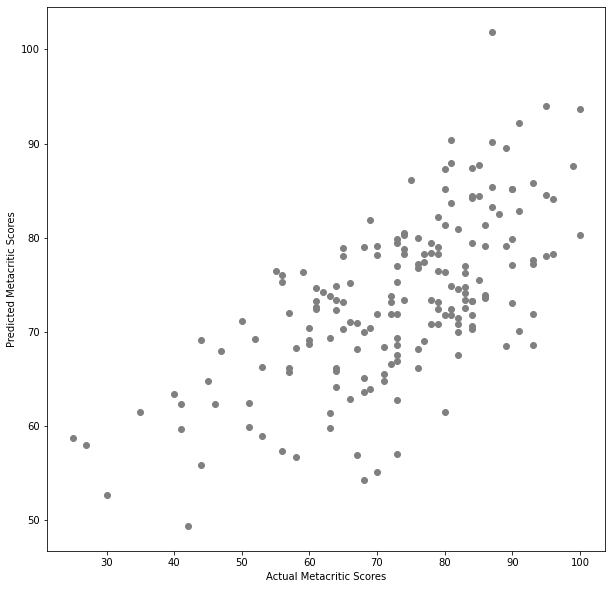

In [41]:
plt.figure(figsize=(10,10))

plt.scatter(y_test, y_pred, color='gray')

plt.xlabel("Actual Metacritic Scores")
plt.ylabel("Predicted Metacritic Scores");